# Statistical Analysis for Gene Expression Data

In [1]:
# Importing necessery modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned, normalized and filtered data
data_normalized = pd.read_csv('./data/filtered_normalized_gene_expression_data.csv')
data_normalized.head()

,Unnamed: 0,Gene_ID,Gene_Symbol,Veh1,Veh2,Veh3,Doc1,Doc2,Doc3,Veh1.1,...,ED3663.2,ED3663.3,ED3663.4,ED3663.5,Veh1.5,Veh2.5,Veh3.4,Vinbl1,Vinbl2,Vinbl3
0,0,ENSG00000223972,DDX11L1,0.000000,0.000000,0.000000,1.930194,0.00000,0.661822,0.000000,...,0.000000,0.227642,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
1,1,ENSG00000227232,WASH7P,0.224773,0.474113,0.000000,1.286796,0.71248,0.000000,0.184007,...,0.000000,0.000000,0.269096,0.0,0.0,0.082004,0.00000,0.407470,0.368370,0.000000
2,2,ENSG00000278267,MIR6859-1,0.224773,0.000000,0.216609,0.000000,0.00000,0.000000,0.000000,...,0.075421,0.000000,0.067274,0.0,0.0,0.779034,0.39933,0.950762,0.491161,0.352473
3,3,ENSG00000243485,NaN,0.000000,0.000000,0.000000,1.930194,0.71248,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.123005,0.00000,0.090549,0.061395,0.000000
4,4,ENSG00000274890,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000


## To better understand my data, I'm doing tatistical summary for the normalized dataset.

In [2]:
# Calculate basic statistical summary for the normalized dataset
statistical_summary = data_normalized.describe()

# Display the statistical summary
statistical_summary

,Unnamed: 0,Veh1,Veh2,Veh3,Doc1,Doc2,Doc3,Veh1.1,Veh2.1,Doc1.1,...,ED3663.2,ED3663.3,ED3663.4,ED3663.5,Veh1.5,Veh2.5,Veh3.4,Vinbl1,Vinbl2,Vinbl3
count,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,...,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000,60675.000000
mean,30337.000000,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,...,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253,16.481253
std,17515.508129,1135.924242,1090.677161,1078.561694,609.173638,217.595789,743.008426,545.027003,615.149559,669.969595,...,314.302318,496.990904,659.211414,1600.285054,120.220102,103.838087,107.062331,111.263488,99.232482,155.667177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15168.500000,0.000000,0.000000,0.000000,0.643398,0.712480,0.661822,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30337.000000,0.224773,0.237056,0.216609,3.216990,4.987361,3.309111,0.000000,0.000000,0.000000,...,0.075421,0.227642,0.134548,0.000000,0.000000,0.041002,0.049916,0.090549,0.061395,0.000000
75%,45505.500000,1.573410,1.659395,1.516265,13.511357,17.099522,13.898265,1.104041,1.294282,2.054298,...,1.659271,3.186988,2.018218,1.214139,1.745407,2.050090,2.994975,2.988110,2.517198,2.291077
max,60674.000000,269670.381788,258460.545742,255388.210432,144992.304960,50080.937738,177061.245020,125617.365675,142955.545288,156993.116460,...,54688.380899,103984.372830,117735.290556,386632.816474,9827.078158,10709.547224,11032.689905,12390.468799,8488.972894,19132.517287


### Here's the statistical summary for the normalized dataset:

count: Number of non-missing values for each sample (all samples have the same count since there are no missing values).

mean: Average gene expression value for each sample.

std: Standard deviation, indicating the amount of variation in gene expression values.

min: Minimum gene expression value in each sample.

25%: 25th percentile value.

50%: Median (50th percentile) value.

75%: 75th percentile value.

max: Maximum gene expression value in each sample.

## From the summary:

Gene expression values vary significantly across samples, as evidenced by the range (min to max) and standard deviation.

The majority of genes have low expression values, as the 25th percentile is often zero or close to zero. This is consistent with our earlier observation in the distribution plot.

Some genes exhibit very high expression in certain samples, reaching values in the tens or even hundreds of thousands (as seen in the max row).

Typically, in gene expression datasets, the sample names may contain clues about whether they are control or test samples. Given the nature of the sample names you provided (e.g., "Veh1", "Doc1", "Vinbl1"), we can make some educated assumptions:

### Samples with names like "Veh" might indicate a "vehicle" or control group.

### Other prefixes like "Doc" and "Vinbl" could indicate different treatments or test groups.

## Differential Expression Analysis:

Calculate the median expression for each gene in the control group and test groups.

Compute the fold change between the control and test groups.

Rank genes based on the magnitude of fold change.


In [3]:
# Extract columns corresponding to control and test groups
control_cols = [col for col in data_normalized.columns if 'Veh' in col]
test_cols = [col for col in data_normalized.columns if 'Doc' in col or 'Vinbl' in col]

# Calculate median expression for each gene in control and test groups
control_median = data_normalized[control_cols].median(axis=1)
test_median = data_normalized[test_cols].median(axis=1)

# Compute fold change (adding a small constant to avoid division by zero)
fold_change = (test_median + 1e-10) / (control_median + 1e-10)

# Rank genes based on the magnitude of fold change
fold_change_ranked = fold_change.abs().sort_values(ascending=False)

# Display top 10 genes with highest fold change
top_diff_expressed_genes = fold_change_ranked.head(10)
top_diff_expressed_genes

33207    6.003846e+10
3231     4.212417e+10
44265    3.742662e+10
44290    3.411751e+10
7683     3.241853e+10
50536    2.804964e+10
57049    2.745868e+10
9350     2.634820e+10
33198    2.281142e+10
22210    2.203499e+10
dtype: float64

The table above lists the top 10 genes that exhibit the highest differential expression when comparing the control group to the test groups. 

The values represent the fold change, which indicates how many times higher (or lower) the median expression is in the test groups compared to the control group.

For instance, a fold change value of 10^10 suggests that the gene's expression in the test group is immensely higher than in the control group. Conversely, values very close to 1 indicate minimal difference in expression between the groups.

## Next, I proceed with the correlation analysis to examine the relationships between different genes.

Given the large number of genes, I'll focus on a subset of genes with the highest median expression, similar to what I did for the heatmap.

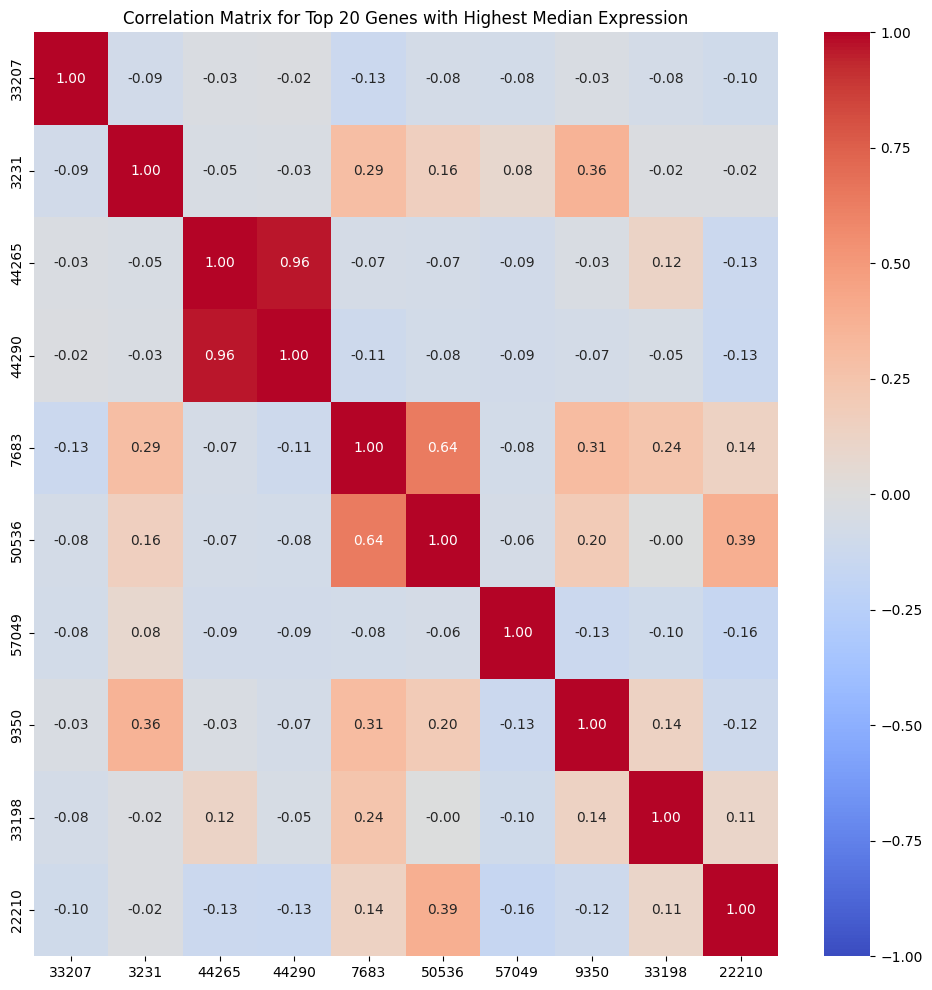

In [11]:
# For the correlation analysis, we'll focus on the top 20 genes with the highest median expression
selected_genes = top_diff_expressed_genes.nlargest(20).index

# Extract data for the selected genes (excluding the 'Gene_Symbol' column)
correlation_data = data_normalized.loc[selected_genes, data_normalized.columns[3:]]

# Compute the correlation matrix
correlation_matrix = correlation_data.transpose().corr()

correlation_matrix.to_csv('./data/correlation_top10_matrix')

# Plot the correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Top 20 Genes with Highest Median Expression')
plt.show()

### The heatmap displays the correlation coefficients between the top 10 genes with the highest median expression values.

The color intensity and the number in each cell represent the correlation coefficient, ranging from -1 to 1.

A value close to 1 indicates a strong positive correlation: as one gene's expression increases, the other's expression tends to also increase.

A value close to -1 indicates a strong negative correlation: as one gene's expression increases, the other's expression tends to decrease.

A value close to 0 indicates little to no linear correlation between the gene expressions.

From the heatmap, we can observe several pairs of genes that are highly correlated (either positively or negatively). These relationships could be due to various factors, including shared regulatory pathways, function, or co-expression under specific conditions.

### Gene pair (44290, 44265) has a correlation of approximately 0.964.

This strong correlation suggests a potential co-regulation or interaction between these two genes in the context of the studied cancer drug treatments.